# YOLO部署实验

## 实验目的
试自行拍摄一幅或多幅含有行人的图像，实现基于 YOLO模型的行人检测

## 实验环境
- Ultralytics

## 实验原理

### 目标检测
目标检测是一项计算机视觉任务，其目的是识别图像或视频中的目标物体，并确定它们的精确位置。目标检测不仅需要告诉我们图像中有哪些物体，还要通过边界框标注出这些物体的位置。

### YOLO
YOLO (You Only Look Once) 是一种速度极快的实时目标检测算法。它通过将输入图像划分为固定大小的网格，并在每个网格单元中同时预测多个边界框和目标类别。YOLO 的最大优势是效率，它仅需一次前向传播便可完成整个图像的检测任务。这一特性使得 YOLO 适用于需要实时响应的应用场景，如自动驾驶和视频监控。

### Ultralytics
为了简化 YOLO 模型的训练和部署，Ultralytics 开发并维护了 YOLO 的最新版本。Ultralytics 是一个开源框架，提供了完整的工具集，支持从模型训练、推理到结果导出的一整套操作。通过安装 Ultralytics 库，用户可以直接使用预训练的 YOLO 模型进行推理，或基于自己的数据集进行迁移学习。Ultralytics 极大地降低了 YOLO 模型的部署门槛。

## 实验流程

根据[官方文档](https://docs.ultralytics.com/quickstart/)创建运行YOLO的虚拟环境：

In [ ]:
%%bash
pip install ultralytics

分别不同距离不同人数的街拍做测试。运行YOLO，参数为：
- `model=yolo11n.pt`：使用YOLOv11模型；
- `task=detect`：检测任务；
- `mode=predict`：仅仅做推理；
- `classes=[0]`：仅检测行人，而`person`的类别id为0；
- `source='../test'`：待检测的图片位置；
- `project='../' name='results'`：输出目标检测标记图片到`../results`。

In [ ]:
%%bash
yolo model=yolo11n.pt task=detect mode=predict classes=[0] source='./test' project='./' name='results'

得到如下输出：
```plaintext
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/3 ../test/1.jpg: 480x640 11 persons, 47.6ms
image 2/3 ../test/2.jpg: 480x640 8 persons, 9.0ms
image 3/3 ../test/3.jpg: 480x640 11 persons, 9.6ms
Speed: 3.4ms preprocess, 22.1ms inference, 59.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to ../results
💡 Learn more at https://docs.ultralytics.com/modes/predict
VS Code: view Ultralytics VS Code Extension ⚡ at https://docs.ultralytics.com/integrations/vscode
```
将输入输出对比：

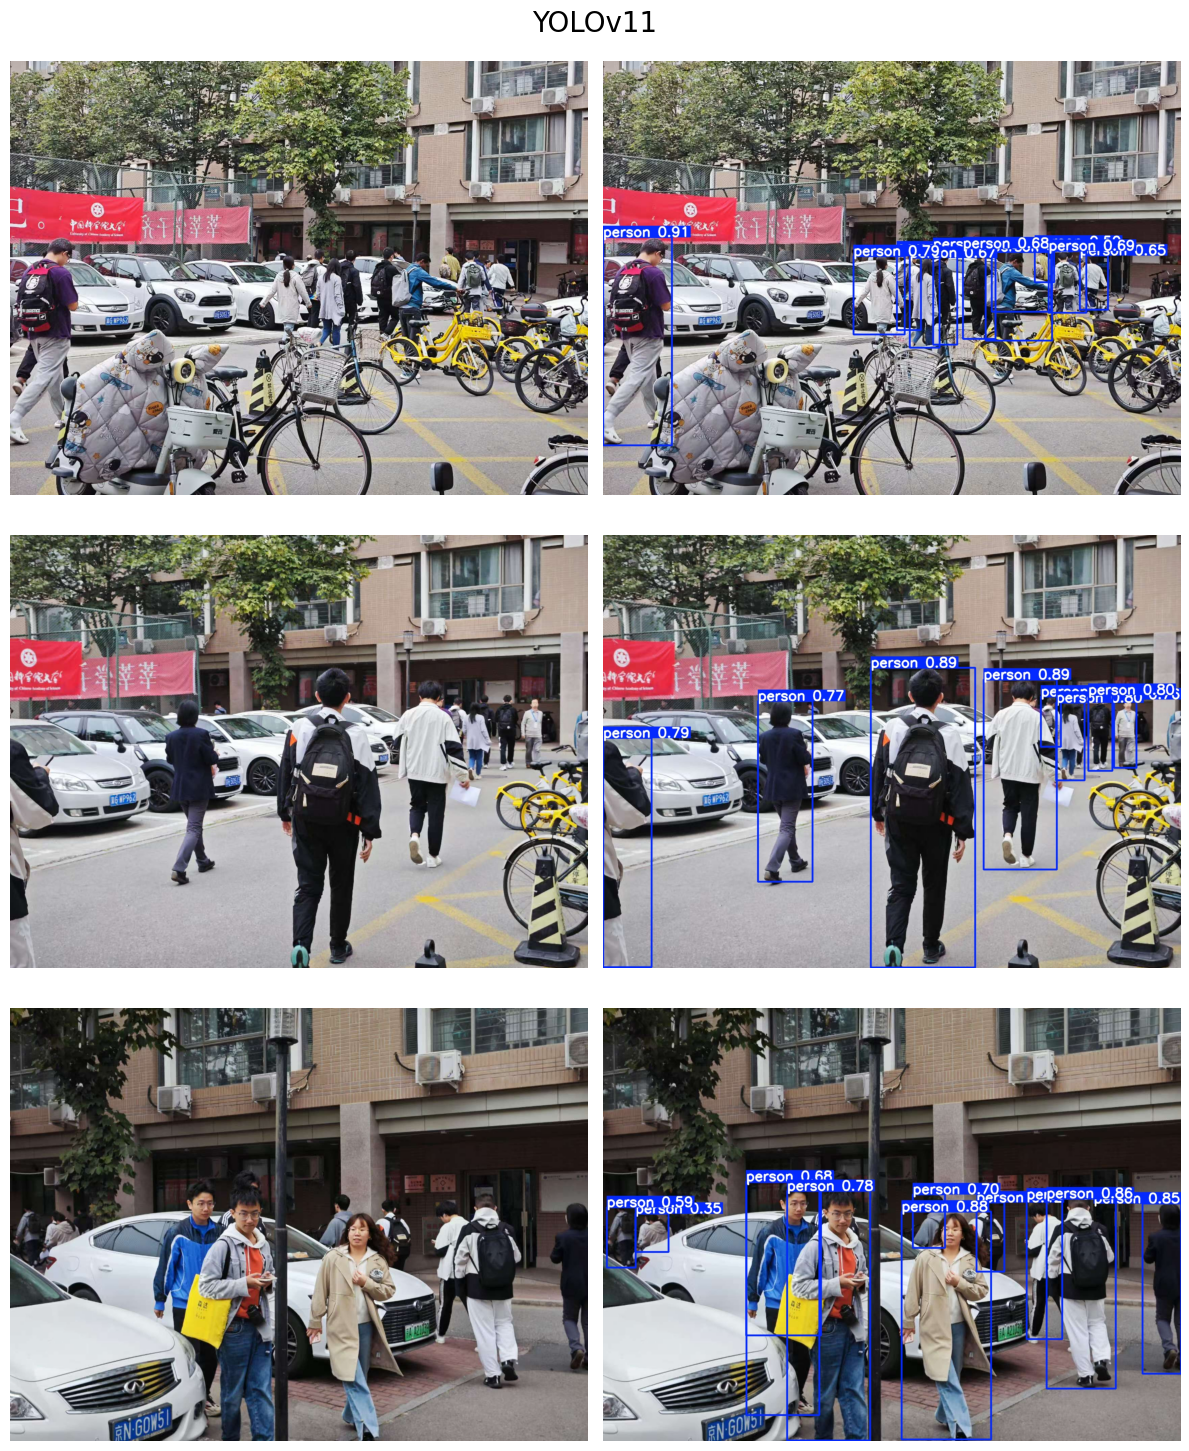

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(12, 15))
for i in range(3):
    ax[i, 0].imshow(plt.imread(f'test/{i+1}.jpg'))
    ax[i, 1].imshow(plt.imread(f'results/{i+1}.jpg'))
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')
fig.suptitle('YOLOv11', fontsize=20)
plt.tight_layout()
plt.show()

可以看到，目标距离差距小时，例如在图3中，所有行人全被检测出；当目标距离差距大时，例如在图1、2中，道路转弯后被车和围栏部分遮挡的行人未被检测到；图1中，最左侧重合的两人被检测为一人；在三张图的测试中，未出现假阳性。总的来说，模型效果很好，而且速度很快，但在远景和被遮挡目标的检测上还有待改善。